<a href="https://colab.research.google.com/github/LuchoValr/Spotify_data/blob/main/data_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as WordCloud

In [23]:
data0 = pd.read_json('https://raw.githubusercontent.com/LuchoValr/Spotify_data/main/data/data_0')
data1 = pd.read_json('https://raw.githubusercontent.com/LuchoValr/Spotify_data/main/data/StreamingHistory1.json')
data2 = pd.read_json('https://raw.githubusercontent.com/LuchoValr/Spotify_data/main/data/StreamingHistory2.json')
data3 = pd.read_json('https://raw.githubusercontent.com/LuchoValr/Spotify_data/main/data/StreamingHistory3.json')

In [24]:
data = pd.concat([data0, data1, data2, data3])
data.head()

,endTime,artistName,trackName,msPlayed
0,2021-12-27 03:58,Ñejo & Dalmata,Pasarela,150040
1,2022-03-26 01:37,G-Eazy,"Me, Myself & I",14600
2,2022-03-26 01:41,Ice Cube,It Was A Good Day,260000
3,2022-03-26 01:42,Young Maylay,San Andreas Theme Song,86546
4,2022-03-26 01:48,Pentakill,Lightbringer,268884


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36175 entries, 0 to 6174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     36175 non-null  object
 1   artistName  36175 non-null  object
 2   trackName   36175 non-null  object
 3   msPlayed    36175 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [26]:
data.to_csv('Spotify_data.csv')

In [27]:
len(data["artistName"].unique())

578

In [28]:
len(data["trackName"].unique())

2094

In [29]:
data["play_time"]= pd.to_datetime(data["endTime"]) 

In [30]:
data['year'] = pd.DatetimeIndex(data["play_time"]).year
data['month'] = pd.DatetimeIndex(data["play_time"]).month
data['day'] = pd.DatetimeIndex(data["play_time"]).day
data['weekday'] = pd.DatetimeIndex(data["play_time"]).weekday
data['time'] = pd.DatetimeIndex(data["play_time"]).time
data['hours'] = pd.DatetimeIndex(data["play_time"]).hour
data['day_name'] = data["play_time"].apply(lambda x: x.day_name())
data['Count'] = 1

In [31]:
data["time_played (hh-mm-ss)"] = pd.to_timedelta(data["msPlayed"], unit='ms')

In [32]:
def hours(td):
    '''To get the hour information'''
    return td.seconds/3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

data["listening_time(hours)"] = data["time_played (hh-mm-ss)"].apply(hours).round(3)
data["listening_time(minutes)"] = data["time_played (hh-mm-ss)"].apply(minutes).round(3)

In [33]:
data.head()

,endTime,artistName,trackName,msPlayed,play_time,year,month,day,weekday,time,hours,day_name,Count,time_played (hh-mm-ss),listening_time(hours),listening_time(minutes)
0,2021-12-27 03:58,Ñejo & Dalmata,Pasarela,150040,2021-12-27 03:58:00,2021,12,27,0,03:58:00,3,Monday,1,0 days 00:02:30.040000,0.042,2.500
1,2022-03-26 01:37,G-Eazy,"Me, Myself & I",14600,2022-03-26 01:37:00,2022,3,26,5,01:37:00,1,Saturday,1,0 days 00:00:14.600000,0.004,0.233
2,2022-03-26 01:41,Ice Cube,It Was A Good Day,260000,2022-03-26 01:41:00,2022,3,26,5,01:41:00,1,Saturday,1,0 days 00:04:20,0.072,4.333
3,2022-03-26 01:42,Young Maylay,San Andreas Theme Song,86546,2022-03-26 01:42:00,2022,3,26,5,01:42:00,1,Saturday,1,0 days 00:01:26.546000,0.024,1.433
4,2022-03-26 01:48,Pentakill,Lightbringer,268884,2022-03-26 01:48:00,2022,3,26,5,01:48:00,1,Saturday,1,0 days 00:04:28.884000,0.074,4.467


In [35]:
data.drop(columns=["endTime","time_played (hh-mm-ss)","msPlayed"], inplace=True)

In [36]:
data.head()

,artistName,trackName,play_time,year,month,day,weekday,time,hours,day_name,Count,listening_time(hours),listening_time(minutes)
0,Ñejo & Dalmata,Pasarela,2021-12-27 03:58:00,2021,12,27,0,03:58:00,3,Monday,1,0.042,2.500
1,G-Eazy,"Me, Myself & I",2022-03-26 01:37:00,2022,3,26,5,01:37:00,1,Saturday,1,0.004,0.233
2,Ice Cube,It Was A Good Day,2022-03-26 01:41:00,2022,3,26,5,01:41:00,1,Saturday,1,0.072,4.333
3,Young Maylay,San Andreas Theme Song,2022-03-26 01:42:00,2022,3,26,5,01:42:00,1,Saturday,1,0.024,1.433
4,Pentakill,Lightbringer,2022-03-26 01:48:00,2022,3,26,5,01:48:00,1,Saturday,1,0.074,4.467


In [37]:
data.describe()

,year,month,day,weekday,hours,Count,listening_time(hours),listening_time(minutes)
count,36175.000000,36175.000000,36175.000000,36175.000000,36175.000000,36175.0,36175.000000,36175.000000
mean,2022.146344,7.624658,15.089924,2.872343,9.263718,1.0,0.026386,1.584889
std,0.353534,3.245164,8.582743,1.961455,8.082097,0.0,0.032530,1.950514
min,2021.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2022.000000,5.000000,8.000000,1.000000,2.000000,1.0,0.000000,0.017000
50%,2022.000000,9.000000,14.000000,3.000000,5.000000,1.0,0.006000,0.383000
75%,2022.000000,10.000000,22.000000,5.000000,17.000000,1.0,0.053000,3.200000
max,2023.000000,12.000000,31.000000,6.000000,23.000000,1.0,0.378000,22.650000


In [38]:
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##Artistas

In [41]:
data["artistName"].count()

36175

In [39]:
unique_artists = data["artistName"].nunique() # Count number of unique artist in dataset
total_artists = data["artistName"].count() # Count total artist in dataset
unique_artist_percentage = unique_artists/total_artists*100 # Get the percentage of the unique
unique_artist_percentage

1.5977885279889426

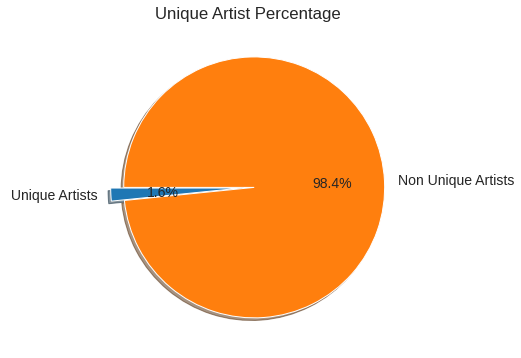

In [42]:
unique_artist_list = np.array([unique_artists, total_artists-unique_artists]) # Make an array out of the results
unique_artist_list_labels = [" Unique Artists", "Non Unique Artists"] # Make a lable for them

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_artist_list, labels= unique_artist_list_labels, autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=180, shadow = True);
plt.title("Unique Artist Percentage");

In [53]:
top_10_artist_df = data.groupby(["artistName"])[["listening_time(hours)","listening_time(minutes)","Count"]].sum().sort_values(by="listening_time(hours)", 
                                                                                                                               ascending=False)
top_10_artist_df.head(15)

,listening_time(hours),listening_time(minutes),Count
artistName,,,
Silvestre Dangond,92.280,5541.394,3579
Churo Diaz,83.511,5016.321,2511
Diomedes Diaz,80.407,4832.611,3462
Ivan Villazon,46.032,2768.095,1784
Jorge Oñate,42.769,2569.363,1863
Los Betos,34.084,2047.503,1170
Los Hermanos Zuleta,31.728,1907.466,1423
Oscar Gamarra,19.357,1161.568,654
Elvis Presley,19.343,1161.065,904


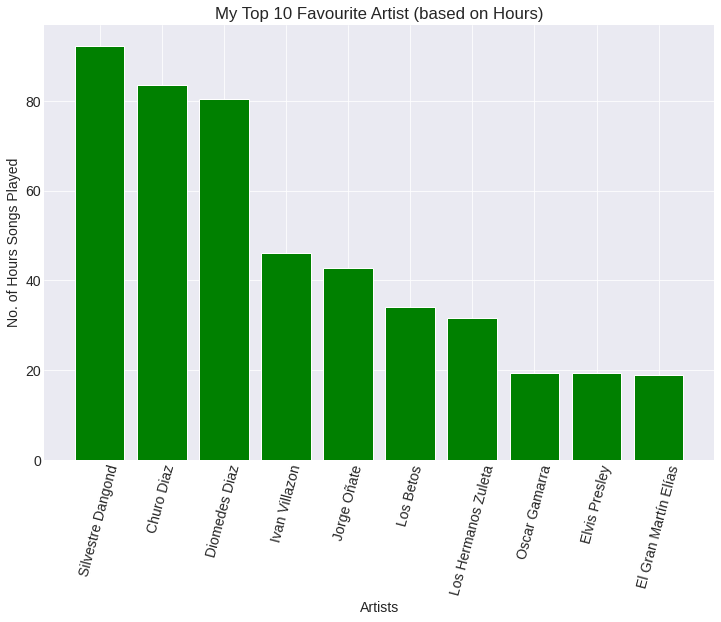

In [54]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_df.head(10).index,top_10_artist_df["listening_time(hours)"].head(10),color='green')
ax.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
plt.xticks(rotation=75);

In [55]:
#Based in count
top_10_artist_count_df = data.groupby(["artistName"])[["listening_time(hours)","listening_time(minutes)","Count"]].sum().sort_values(by="Count", 
                                                                                                                               ascending=False)
top_10_artist_count_df.head(15)

,listening_time(hours),listening_time(minutes),Count
artistName,,,
Silvestre Dangond,92.280,5541.394,3579
Diomedes Diaz,80.407,4832.611,3462
Churo Diaz,83.511,5016.321,2511
Jorge Oñate,42.769,2569.363,1863
Ivan Villazon,46.032,2768.095,1784
Los Hermanos Zuleta,31.728,1907.466,1423
Los Betos,34.084,2047.503,1170
Elvis Presley,19.343,1161.065,904
El Gran Martín Elías,18.840,1131.460,839


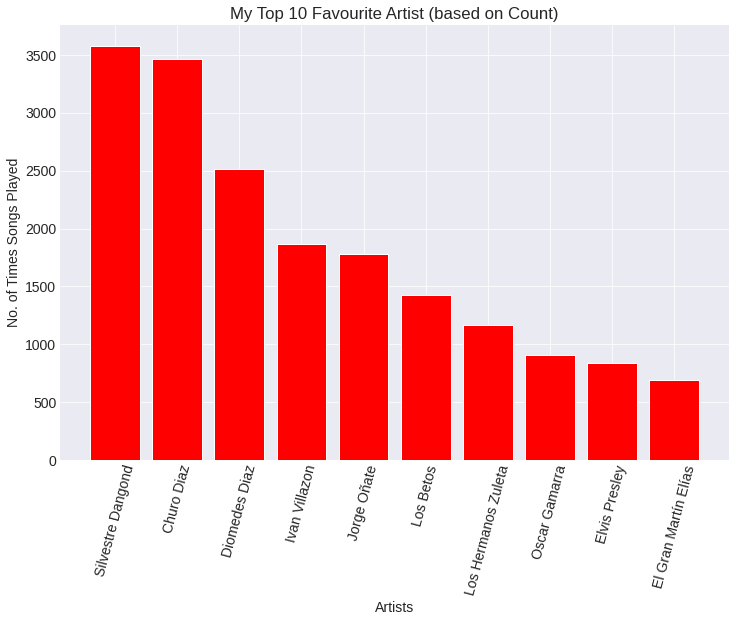

In [65]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_df.head(10).index,top_10_artist_count_df["Count"].head(10),color='red')
ax.set(title="My Top 10 Favourite Artist (based on Count)",xlabel="Artists",ylabel="No. of Times Songs Played");
plt.xticks(rotation=75);

In [59]:
#Minutes
top_10_artist_minutes_df = data.groupby(["artistName"])[["listening_time(hours)","listening_time(minutes)","Count"]].sum().sort_values(by="listening_time(minutes)", 
                                                                                                                               ascending=False)
top_10_artist_minutes_df.head(15)

,listening_time(hours),listening_time(minutes),Count
artistName,,,
Silvestre Dangond,92.280,5541.394,3579
Churo Diaz,83.511,5016.321,2511
Diomedes Diaz,80.407,4832.611,3462
Ivan Villazon,46.032,2768.095,1784
Jorge Oñate,42.769,2569.363,1863
Los Betos,34.084,2047.503,1170
Los Hermanos Zuleta,31.728,1907.466,1423
Oscar Gamarra,19.357,1161.568,654
Elvis Presley,19.343,1161.065,904


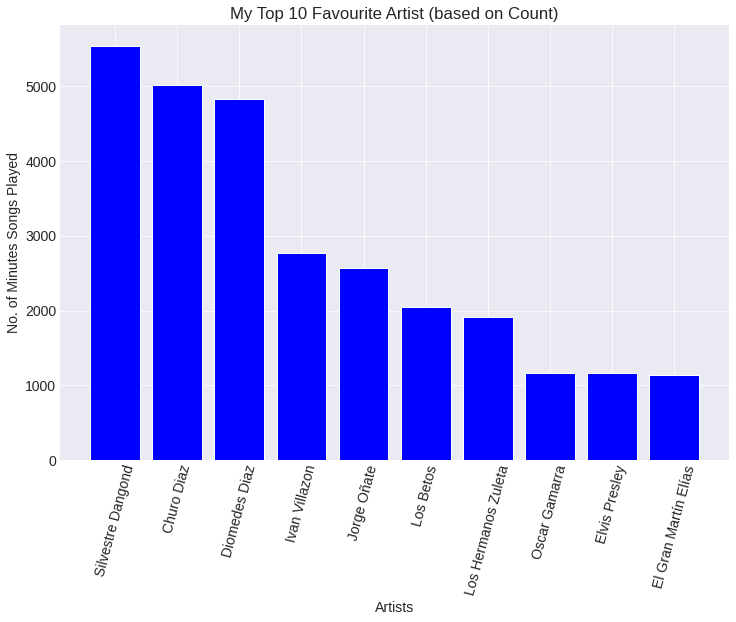

In [64]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_artist_df.head(10).index,top_10_artist_minutes_df["listening_time(minutes)"].head(10),color='blue')
ax.set(title="My Top 10 Favourite Artist (based on Count)",xlabel="Artists",ylabel="No. of Minutes Songs Played");
plt.xticks(rotation=75);

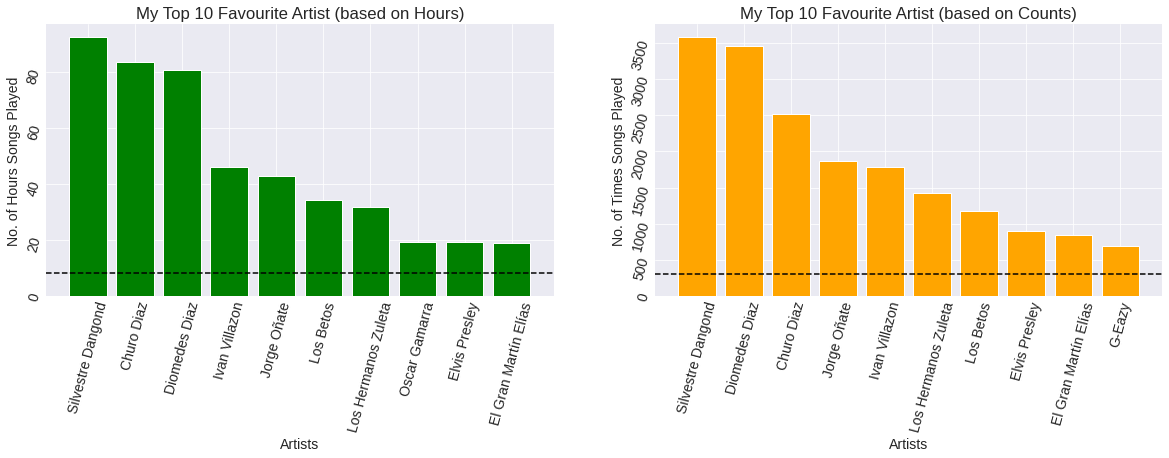

In [66]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_artist_df.head(10).index,top_10_artist_df["listening_time(hours)"].head(10), color="green")
ax1.set(title="My Top 10 Favourite Artist (based on Hours)",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=75);
ax1.axhline(top_10_artist_df["listening_time(hours)"][:100].mean(), linestyle="--", color="black")

# Setting up our seecond graph
ax2.bar(top_10_artist_count_df.head(10).index,top_10_artist_count_df["Count"].head(10), color="orange")
ax2.set(title="My Top 10 Favourite Artist (based on Counts)",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=75);
ax2.axhline(top_10_artist_count_df["Count"][:100].mean(), linestyle="--", color="black");

##Canciones

In [67]:
unique_songs = data["trackName"].nunique()
total_songs = data["trackName"].count()
unique_songs_percentage = unique_songs/total_songs*100
unique_songs_percentage

5.78852798894264

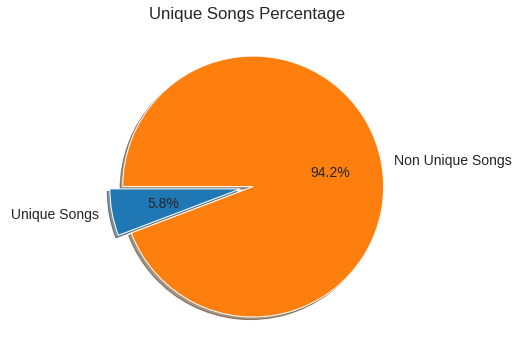

In [68]:
unique_songs_list = np.array([unique_songs, total_songs-unique_songs])
unique_songs_list_labels = [" Unique Songs", "Non Unique Songs"]

fig, ax = plt.subplots(figsize=(12,6))
ax.pie(unique_songs_list, labels= unique_songs_list_labels, autopct='%1.1f%%', explode=[0.05,0.05], startangle=180, shadow = True);
plt.title("Unique Songs Percentage");

In [70]:
top_10_songs_time_df = data.groupby(["trackName"])[["listening_time(hours)","listening_time(minutes)",
                                                                 "Count"]].sum().sort_values(by="listening_time(minutes)",ascending=False)
top_10_songs_count_df = data.groupby(["trackName"])[["listening_time(hours)","listening_time(minutes)",
                                                                  "Count"]].sum().sort_values(by="Count",ascending=False)

In [72]:
top_10_songs_time_df.head(15)

,listening_time(hours),listening_time(minutes),Count
trackName,,,
El Cacho,8.543,513.527,167
No Se Tu,7.428,446.422,188
La Dueña de Mi Suerte,6.316,378.544,101
El Gustico,5.466,329.439,141
La Misma Mujer,4.874,292.994,87
"Que Tal, Que Tal",4.689,281.284,133
Bajo Perfil,4.466,269.189,120
Cambia El Nido,4.335,260.423,100
El Original,4.154,249.511,101


In [73]:
top_10_songs_count_df.head(15)

,listening_time(hours),listening_time(minutes),Count
trackName,,,
No Se Tu,7.428,446.422,188
El Cacho,8.543,513.527,167
El Gustico,5.466,329.439,141
"Que Tal, Que Tal",4.689,281.284,133
Perdóname,2.963,178.171,128
Rubberneckin',3.149,188.935,127
Bajo Perfil,4.466,269.189,120
Lo Mismo Me Da,2.483,149.175,119
La Consentida,3.983,238.795,119


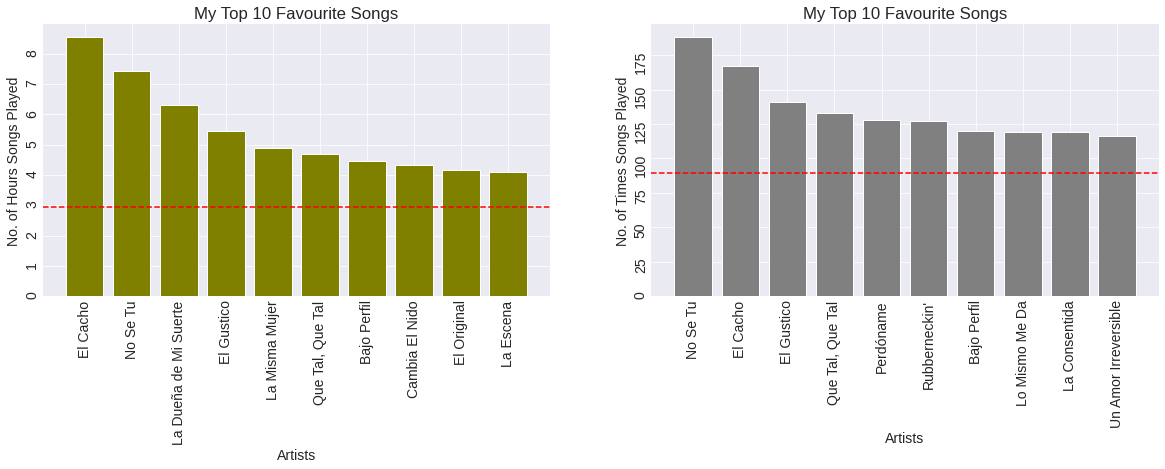

In [71]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_10_songs_time_df.head(10).index,top_10_songs_time_df["listening_time(hours)"].head(10), color="olive")
ax1.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Hours Songs Played");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_10_songs_time_df["listening_time(hours)"][:100].mean(), linestyle="--", color="r")

# Setting up our second graph
ax2.bar(top_10_songs_count_df.head(10).index,top_10_songs_count_df["Count"].head(10), color="gray")
ax2.set(title="My Top 10 Favourite Songs",xlabel="Artists",ylabel="No. of Times Songs Played");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_10_songs_count_df["Count"][:100].mean(), linestyle="--", color="r");

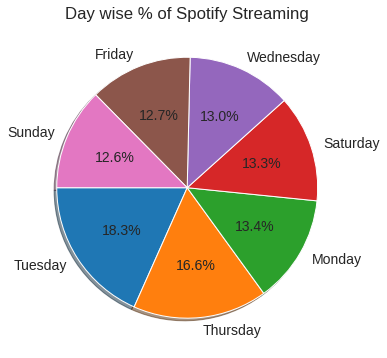

In [77]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(data["day_name"].value_counts(), labels=data["day_name"].value_counts().index, autopct='%1.1f%%', startangle=180, shadow = True);
ax.set(title="Day wise % of Spotify Streaming");

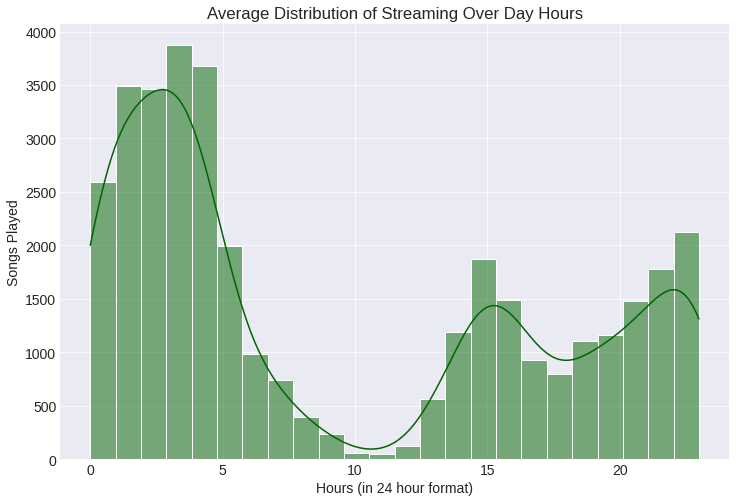

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(title="Average Distribution of Streaming Over Day Hours",xlabel="Hours (in 24 hour format)", ylabel="Songs Played")
sns.histplot(data["hours"], bins=24,kde=True, color="darkgreen");

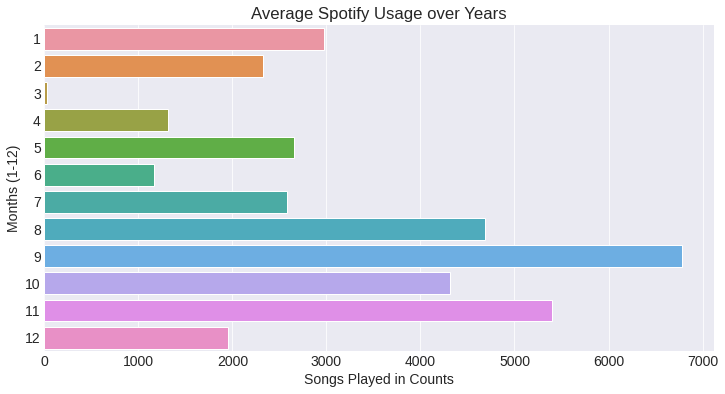

In [79]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.countplot(y=data["month"], ax=ax)
ax.set(title="Average Spotify Usage over Years", xlabel="Songs Played in Counts", ylabel="Months (1-12)");

In [88]:
fav_artist = data.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

artistName
Silvestre Dangond    3579
Diomedes Diaz        3462
Churo Diaz           2511
Jorge Oñate          1863
Ivan Villazon        1784
                     ... 
C. Tangana             52
Mike Bahía             51
Luis Bacalov           51
Amenazzy               51
50 Cent                51
Name: Count, Length: 100, dtype: int64

In [86]:
fav_songs = data.groupby(["trackName"])["Count"].count()

In [90]:
#fig, ax = plt.subplots(figsize=(20,15))
#wordcloud = WordCloud(width=1000, height=600, max_words=100, relative_scaling=1, normalize_plurals=False).generate_from_frequencies(fav_artist)
#ax.imshow(wordcloud, interpolation='bilinear')
#plt.axis(False);

In [84]:
my_fav_artist_playlist = data.groupby(["artistName","trackName"])[["Count"]].count().sort_values(by="Count",ascending=False).head(100)

In [85]:
my_fav_artist_playlist

Count
artistName    trackName                
Churo Diaz    No Se Tu              188
              El Cacho              167
              El Gustico            141
              Que Tal, Que Tal      133
Elvis Presley Rubberneckin'         127
...                                 ...
Grupo Kvrass  Cosa Sabrosa           72
Ivan Villazon Intensa Tu             72
Diomedes Diaz Yo Soy El Indio        71
              Brindo Con El Alma     71
              Te Necesito            71

[100 rows x 1 columns]

In [92]:
data["date"] = data["play_time"].dt.date # Creating a new column with date
most_songs = data.groupby(["date"])[["Count"]].sum().sort_values(by="Count", ascending=False)
most_songs.head(1)

,Count
date,
2022-09-29,657


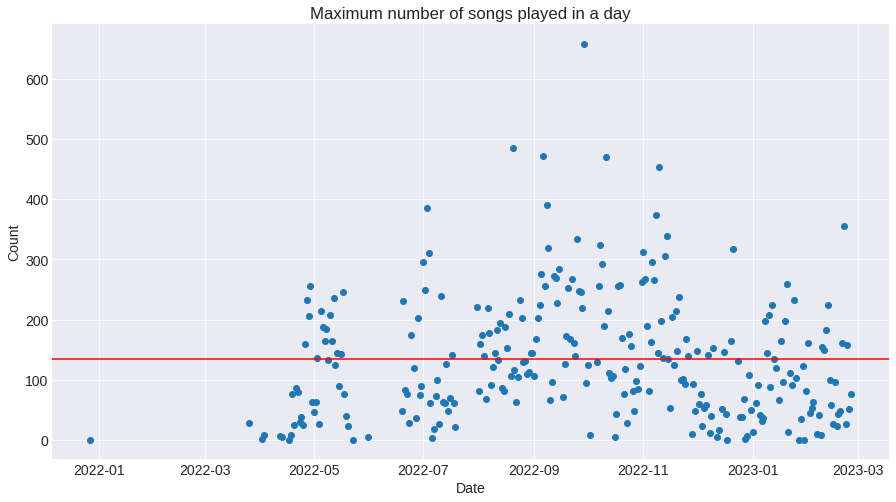

In [93]:
fig,ax = plt.subplots(figsize=(15,8))
ax.scatter(most_songs.index,most_songs["Count"]);
ax.set(title="Maximum number of songs played in a day",xlabel="Date",ylabel="Count");
ax.axhline(most_songs["Count"].mean(), linestyle="-", color="r");

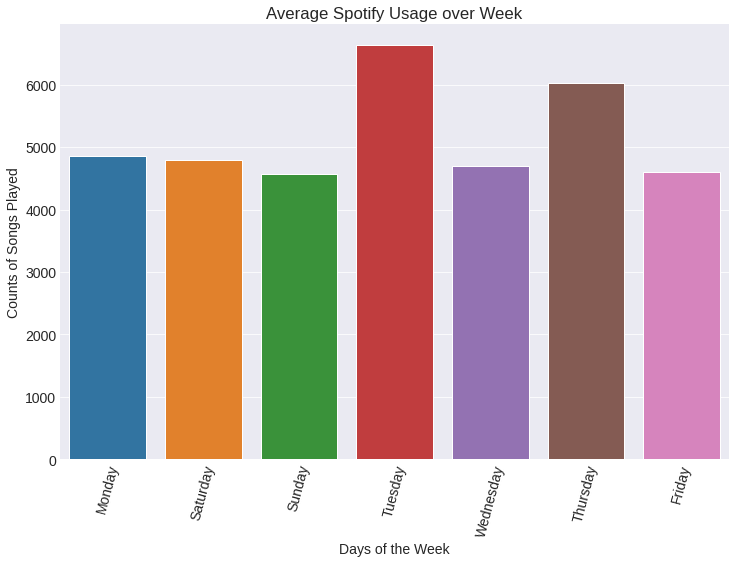

In [95]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x=data["day_name"],ax=ax)
plt.xticks(rotation=75);
ax.set(title="Average Spotify Usage over Week",xlabel="Days of the Week",ylabel="Counts of Songs Played");